# Testing

A large-ish notebook that does some, mostly qualitative, testing of various _explorationlib_ functions.

### Shared imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from explorationlib import agent
from explorationlib import local_gym as gym
from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_hist
from explorationlib.plot import plot_targets
from explorationlib.run import experiment
from explorationlib.util import load

### Config notebook

In [2]:
%matplotlib inline
%load_ext nb_black
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"

<IPython.core.display.Javascript object>

# Test - random search agents - 1
- First use the `gym.Field`, an open space. Verify the step length distributions, and qualitative behave/position data

In [3]:
env = gym.Field()

brown = agent.Diffusion2d(scale=1)
levy = agent.Levy2d(exponent=2)
uniform = agent.Uniform2d(scale=1)

<IPython.core.display.Javascript object>

In [4]:
# How long to run? Longer is better, but slower.
num_steps = 5000

# !
experiment("data/uniform.pkl", uniform, env, num_steps=num_steps, num_repeats=1)
experiment("data/levy.pkl", levy, env, num_steps=num_steps, num_repeats=1)
experiment("data/brown.pkl", brown, env, num_steps=num_steps, num_repeats=1)

# Load the results
levy_exp = load("data/levy.pkl")
brown_exp = load("data/brown.pkl")
uni_exp = load("data/uniform.pkl")

<IPython.core.display.Javascript object>

### show available data from the experiment

In [5]:
levy_exp.keys()

dict_keys(['step', 'repeat', 'state', 'action', 'reward', 'info', 'agent_step', 'agent_angle', 'agent_l', 'agent_action', 'env', 'agent'])

<IPython.core.display.Javascript object>

### plot position data

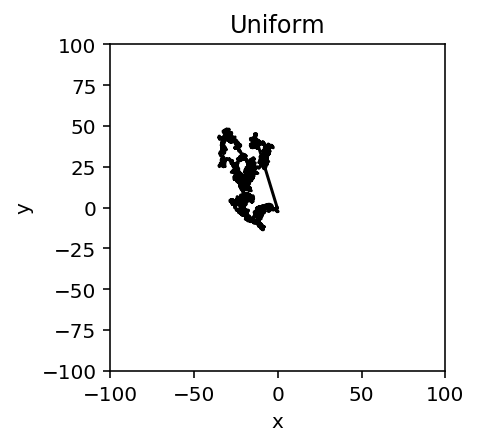

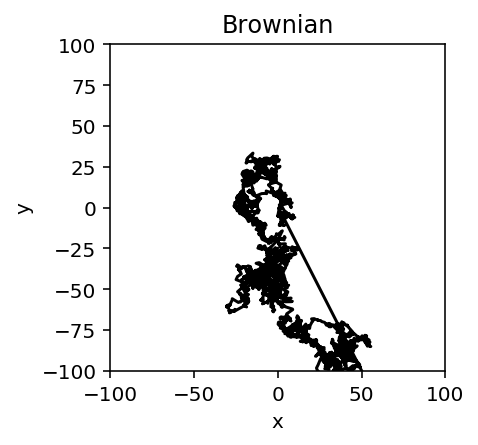

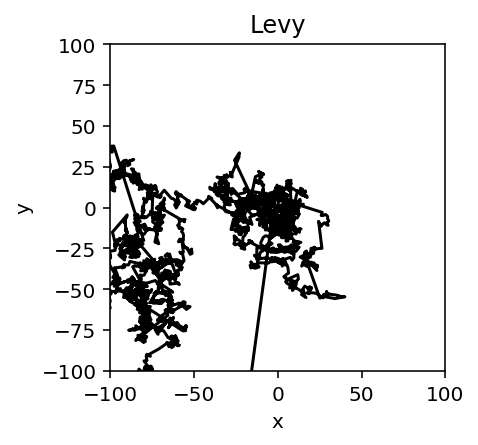

<IPython.core.display.Javascript object>

In [6]:
boundary = (100, 100)

plot_position2d(uni_exp, boundary=boundary, title="Uniform", alpha=1)
plot_position2d(brown_exp, boundary=boundary, title="Brownian", alpha=1)
plot_position2d(levy_exp, boundary=boundary, title="Levy", alpha=1)

### plot step length distributions

- _Uniform_ should be flat
- _Diffusion_ should look like a exponential curve
- _Levy_ should be a very steep curve, a power law

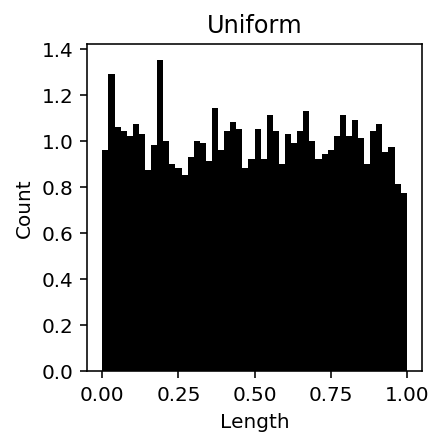

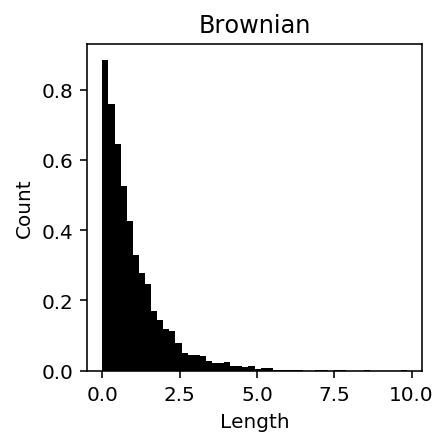

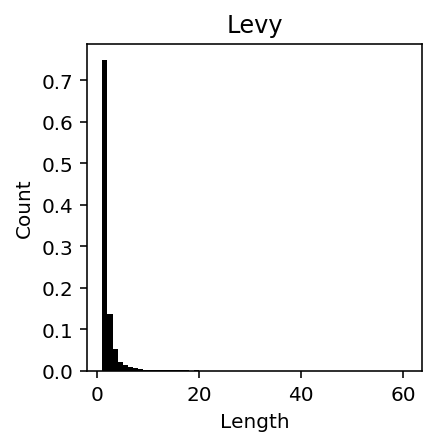

<IPython.core.display.Javascript object>

In [7]:
ax_u = plot_hist(uni_exp, title="Uniform", loglog=False, bins=50, density=True, alpha=1)
ax_b = plot_hist(
    brown_exp, title="Brownian", loglog=False, bins=50, density=True, alpha=1
)
ax_l = plot_hist(levy_exp, title="Levy", loglog=False, bins=60, density=True, alpha=1)

### plot loglog length distributions

- _Uniform_ should be flat(ish) still
- _Diffusion_ should drop of quick for large l
- _Levy_ should be a downward going straight line

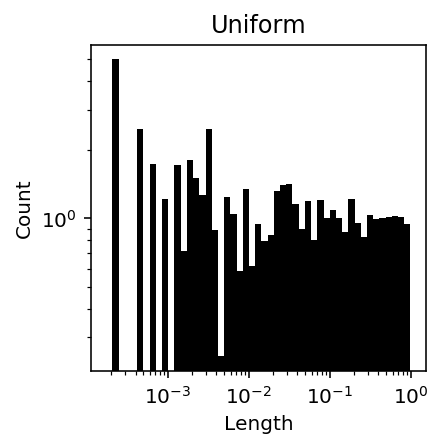

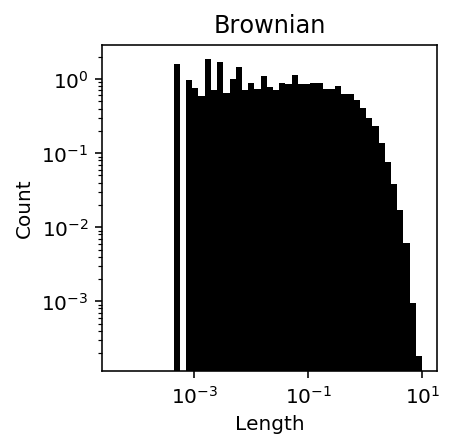

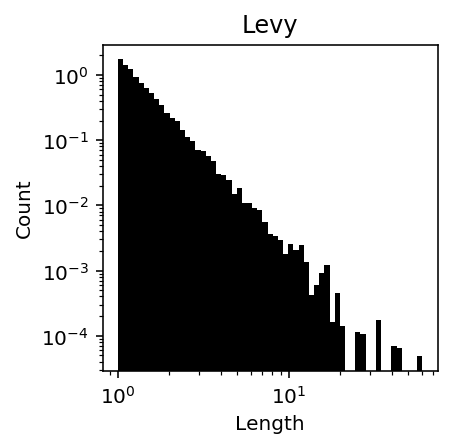

<IPython.core.display.Javascript object>

In [8]:
ax_u = plot_hist(uni_exp, title="Uniform", loglog=True, bins=50, density=True, alpha=1)
ax_b = plot_hist(
    brown_exp, title="Brownian", loglog=True, bins=50, density=True, alpha=1
)
ax_l = plot_hist(levy_exp, title="Levy", loglog=True, bins=60, density=True, alpha=1)

# Test - random search agents - 2
- Next use the `gym.Field` with various (bounded) target distributions. Verify target gathering performance across agents.

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [10]:
target_boundary = (10, 10)
dense_targets = gym.uniform_targets(100, target_boundary)
dense_values = gym.constant_values(dense_targets, 1)
sparse_targets = gym.uniform_targets(10, target_boundary)
sparse_values = gym.constant_values(sparse_targets, 1)

<IPython.core.display.Javascript object>

Targets should be bound within (-10, 10)

In [11]:
np.vstack(dense_targets).min(), np.vstack(dense_targets).max()

(-9.976602368776552, 9.969179995093658)

<IPython.core.display.Javascript object>

Values should be 1

In [12]:
dense_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<IPython.core.display.Javascript object>

Load agents, and the envs

In [13]:
dense_env = gym.Field()
dense_env.add_targets(dense_targets, dense_values)

sparse_env = gym.Field()
sparse_env.add_targets(sparse_targets, sparse_values)

brown = agent.Diffusion2d(scale=1)
levy2 = agent.Levy2d(exponent=2)
levy3 = agent.Levy2d(exponent=3)

<IPython.core.display.Javascript object>

Plot the targets

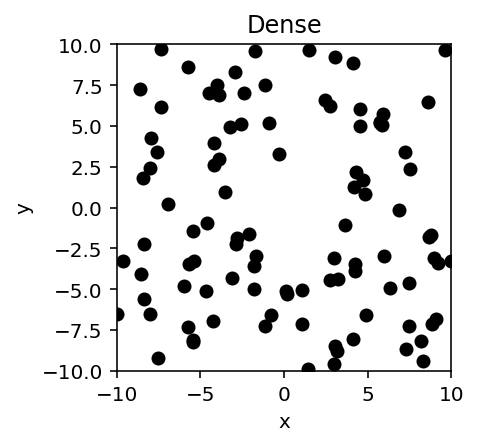

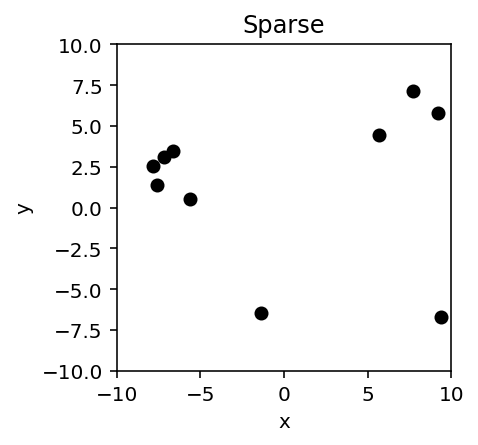

<IPython.core.display.Javascript object>

In [14]:
plot_targets(dense_env, boundary=target_boundary, title="Dense")
plot_targets(sparse_env, boundary=target_boundary, title="Sparse")

### Run 25 experiments
For both _Dense_ and _Sparse_ each with `num_steps`.

In [15]:
num_repeats = 25
num_steps = 1000

<IPython.core.display.Javascript object>

In [ ]:
experiment(
    f"data/dense_uniform.pkl",
    uniform,
    dense_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)
experiment(
    f"data/dense_levy2.pkl",
    levy2,
    dense_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)
experiment(
    f"data/dense_levy3.pkl",
    levy3,
    dense_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)
experiment(
    f"data/dense_brown.pkl",
    brown,
    dense_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)

In [ ]:
experiment(
    f"data/sparse_uniform.pkl",
    uniform,
    sparse_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)
experiment(
    f"data/sparse_levy2.pkl",
    levy2,
    sparse_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)
experiment(
    f"data/sparse_levy3.pkl",
    levy3,
    sparse_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)
experiment(
    f"data/sparse_brown.pkl",
    brown,
    sparse_env,
    num_steps=num_steps,
    num_repeats=num_repeats,
)

### Load the results

In [ ]:
uni_dense = load("data/dense_uniform.pkl")
levy2_dense = load("data/dense_levy2.pkl")
levy3_dense = load("data/dense_levy3.pkl")
brown_dense = load("data/dense_brown.pkl")

uni_sparse = load("data/sparse_uniform.pkl")
levy2_sparse = load("data/sparse_levy2.pkl")
levy3_sparse = load("data/sparse_levy3.pkl")
brown_sparse = load("data/sparse_brown.pkl")

In [ ]:
from explorationlib.score import reward_summary

In [ ]:
reward_summary(levy2_dense)